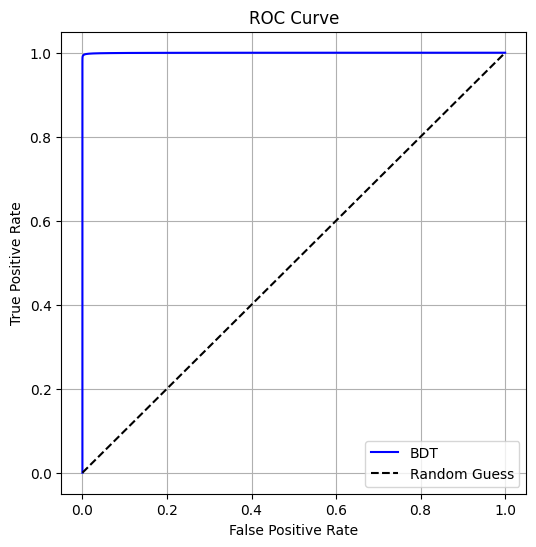

In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Open ROOT file and get histograms
f = ROOT.TFile.Open("BDToutputfiles/BDTcheck10full_analysis_full.root")
h_sig = f.Get("hSigTest")  # BDT output histogram for signal
h_bkg = f.Get("hBkgTest")  # BDT output histogram for background

# Normalize histograms
h_sig.Scale(1.0 / h_sig.Integral())
h_bkg.Scale(1.0 / h_bkg.Integral())

# Arrays to store ROC points
sig_eff = []
bkg_eff = []

n_bins = h_sig.GetNbinsX()

# Loop over thresholds from left to right
for i in range(1, n_bins + 1):
    # Threshold is the lower edge of bin i
    tp = h_sig.Integral(i, n_bins)
    fp = h_bkg.Integral(i, n_bins)
    tn = h_bkg.Integral() - fp
    fn = h_sig.Integral() - tp
    sig_eff.append(tp/(tp+fn))
    bkg_eff.append(fp/(tn+fp))

# Convert to numpy arrays
sig_eff = np.array(sig_eff)
bkg_eff = np.array(bkg_eff)

# Plot ROC: TPR (sig_eff) vs FPR (1 - bkg_eff)
plt.figure(figsize=(6, 6))
plt.plot(bkg_eff, sig_eff, label="BDT", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.savefig("BDToutputgraphs/roc_curve_BDTcheck10full.png", dpi=300)
plt.show()


In [2]:
from numpy import trapezoid

# X-axis = 1 - bkg_eff (False Positive Rate)
# Y-axis = sig_eff (True Positive Rate)
fpr = 1 - bkg_eff
tpr = sig_eff

# Sort FPR to ensure proper AUC calculation
sorted_indices = np.argsort(fpr)
fpr = fpr[sorted_indices]
tpr = tpr[sorted_indices]

# Compute AUC
auc = trapezoid(tpr, fpr)
print(f"AUC = {auc:.6f}")

AUC = 0.999767
